In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import cv2 as cv
import numpy as np
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [4]:
fvqa_images_path = "F:\\NUST\\thesis_local\\Practice\\FVQA\\images"
def show_fvqa_image(image_name):
    print(image_name)
    plt.imshow(plt.imread(os.path.join(fvqa_images_path, image_name)))

In [5]:
all_facts_file_path = 'fvqa_data//all_fact_triples_release.json'
all_facts_data_df = pd.read_json(all_facts_file_path, orient ='index')
all_facts_data_df.head()

,KB,e1_label,e2_label,uri,surface,dataset,sources,r,context,score,e1,e2,isnegated
conceptnet/e/a9c086711e083ba3503a06846848e30999b4d3f7,conceptnet,monkey meat,meat,"/a/[/r/RelatedTo/,/c/en/monkey_meat/n/,/c/en/m...",[[monkey meat]] is related to [[meat]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/monkey_meat/n,/c/en/meat,NaN
conceptnet/e/acfa62a6eab1fd51f6bafca20f46277c37f1bcb9,conceptnet,neuroimaging,image,"/a/[/r/EtymologicallyDerivedFrom/,/c/en/neuroi...","The word ""[[neuroimaging]]"" etymologically com...",/d/wiktionary/en/en,"/and/[/s/rule/etymology_section/,/s/web/en.wik...",/r/EtymologicallyDerivedFrom,/ctx/all,1.0,/c/en/neuroimaging,/c/en/image,NaN
conceptnet/e/f00e325c34450297a00026be9a99b63e339e5539,conceptnet,jamaica,island,"/a/[/r/RelatedTo/,/c/en/jamaica/n/,/c/en/island/]",[[Jamaica]] is related to [[island]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/jamaica/n,/c/en/island,NaN
conceptnet/e/9e911a1a354fde0b691a62681e10ac3c7cf09407,conceptnet,train,arrive at station,"/a/[/r/CapableOf/,/c/en/train/,/c/en/arrive_at...",[[a train]] can [[arrive at a station]],/d/conceptnet/4/en,/and/[/s/activity/omcs/omcs1_possibly_free_tex...,/r/CapableOf,/ctx/all,1.0,/c/en/train,/c/en/arrive_at_station,NaN
conceptnet/e/a86ca74c722e436c1fdb7084daa45ff03a93c1ab,conceptnet,aletschhorn,mountain,"/a/[/r/RelatedTo/,/c/en/aletschhorn/n/,/c/en/m...",[[Aletschhorn]] is related to [[mountain]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/aletschhorn/n,/c/en/mountain,NaN


In [6]:
question_file_path = 'fvqa_data//all_qs_dict_release.json'
questions_data_df = pd.read_json(question_file_path, orient ='index')
questions_data_df['fact'] = questions_data_df['fact'].apply(lambda x: str(x[0]))
questions_data_df.head()

,fact_surface,ans_source,answer,question,img_file,visual_concept,kb_source,fact,question_id
270,You are likely to find [[a trumpet]] in [[a ja...,image,trumpet,Which object can be found in a jazz club,ILSVRC2012_test_00050748.JPEG,obj,conceptnet,conceptnet/e/f768f157e4446dd594536f8ef02681515...,270
271,[[lipstick]] belongs to the category of [[Cosm...,image,lipstick,Tell me the name of the cosmetics shown in thi...,ILSVRC2012_test_00000444.JPEG,obj,dbpedia,dbpedia/8657,271
272,[[Lipstick]] is for [[coloring the lips]],kb,coloring the lips,What is the object shown in this image used for,ILSVRC2012_test_00000444.JPEG,obj,conceptnet,conceptnet/e/18b413dee0ebe3cadef337f364baa6164...,272
273,You are likely to find [[lipstick]] in [[a mak...,kb,a makeup cabinet,Where can you find the object in this image,ILSVRC2012_test_00000444.JPEG,obj,conceptnet,conceptnet/e/c8399f11b843cb0fa84dbfe8659542126...,273
274,[[A kite]] has [[a tail]],image,kite,Which object in this image has a tail,COCO_val2014_000000005599.jpg,obj,conceptnet,conceptnet/e/1e9f66df12d446019dc02db7fe054b87c...,274


In [7]:
# join question with fact dataframe to create join question with facts dataframe
merged_ques_facts_df = pd.merge(questions_data_df, all_facts_data_df , right_index=True, left_on='fact')

In [8]:
merged_ques_facts_df.head()

,fact_surface,ans_source,answer,question,img_file,visual_concept,kb_source,fact,question_id,KB,e1_label,e2_label,uri,surface,dataset,sources,r,context,score,e1,e2,isnegated
270,You are likely to find [[a trumpet]] in [[a ja...,image,trumpet,Which object can be found in a jazz club,ILSVRC2012_test_00050748.JPEG,obj,conceptnet,conceptnet/e/f768f157e4446dd594536f8ef02681515...,270,conceptnet,trumpet,jazz club,"/a/[/r/AtLocation/,/c/en/trumpet/,/c/en/jazz_c...",You are likely to find [[a trumpet]] in [[a ja...,/d/conceptnet/4/en,"/and/[/s/activity/omcs/globalmind/,/s/contribu...",/r/AtLocation,/ctx/all,1.0,/c/en/trumpet,/c/en/jazz_club,NaN
271,[[lipstick]] belongs to the category of [[Cosm...,image,lipstick,Tell me the name of the cosmetics shown in thi...,ILSVRC2012_test_00000444.JPEG,obj,dbpedia,dbpedia/8657,271,dbpedia,lipstick,Cosmetics,NaN,[[lipstick]] belongs to the category of [[Cosm...,NaN,NaN,dbpedia/transnbhd,NaN,1.0,http://dbpedia.org/resource/Lipstick,http://dbpedia.org/resource/Cosmetics,NaN
569,[[lipstick]] belongs to the category of [[Cosm...,image,lipstick,what object in this image is a cosmetic placed...,ILSVRC2012_test_00045533.JPEG,obj,dbpedia,dbpedia/8657,569,dbpedia,lipstick,Cosmetics,NaN,[[lipstick]] belongs to the category of [[Cosm...,NaN,NaN,dbpedia/transnbhd,NaN,1.0,http://dbpedia.org/resource/Lipstick,http://dbpedia.org/resource/Cosmetics,NaN
272,[[Lipstick]] is for [[coloring the lips]],kb,coloring the lips,What is the object shown in this image used for,ILSVRC2012_test_00000444.JPEG,obj,conceptnet,conceptnet/e/18b413dee0ebe3cadef337f364baa6164...,272,conceptnet,lipstick,color lip,"/a/[/r/UsedFor/,/c/en/lipstick/,/c/en/color_lip/]",[[Lipstick]] is for [[coloring the lips]],/d/conceptnet/4/en,/and/[/s/activity/omcs/omcs1_possibly_free_tex...,/r/UsedFor,/ctx/all,1.0,/c/en/lipstick,/c/en/color_lip,NaN
383,[[Lipstick]] is for [[coloring the lips]],image,lipstick,Which item in this image is used for colouring...,ILSVRC2012_test_00002289.JPEG,obj,conceptnet,conceptnet/e/18b413dee0ebe3cadef337f364baa6164...,383,conceptnet,lipstick,color lip,"/a/[/r/UsedFor/,/c/en/lipstick/,/c/en/color_lip/]",[[Lipstick]] is for [[coloring the lips]],/d/conceptnet/4/en,/and/[/s/activity/omcs/omcs1_possibly_free_tex...,/r/UsedFor,/ctx/all,1.0,/c/en/lipstick,/c/en/color_lip,NaN


### FVQA Dictionary

In [ ]:
import re
from string import punctuation

import collections
import re
col_filter = ['answer', 'question']
filtered_df = merged_ques_facts_df.loc[:,col_filter]
list_of_words = [re.sub('[^a-zA-Z]+', '', y) for x in filtered_df.values.flatten() for y in str(x).lower().split() if y not in punctuation]


e1_labels = [y.lower() for y in all_facts_data_df['e1_label'].values]
e1_label_words = [y for x in e1_labels for y in str(x).lower().split() if y not in punctuation]

e2_labels = [y.lower() for y in all_facts_data_df['e2_label'].values]
e2_label_words = [y for x in e2_labels for y in str(x).lower().split() if y not in punctuation]

list_of_words.extend(e1_label_words)
list_of_words.extend(e2_label_words)

fvqa_count_words = collections.Counter(list_of_words)
fvqa_total_words = len(list_of_words)
fvqa_sorted_words = fvqa_count_words.most_common(fvqa_total_words)
fvqa_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(fvqa_sorted_words)}
fvqa_int_to_vocab = {i+1:w for i, (w,c) in enumerate(fvqa_sorted_words)}

file = open("generated_fvqa_data//fvqa_int_to_vocab.json", "w")
json.dump(fvqa_int_to_vocab, file)
file.close()

file = open("generated_fvqa_data//fvqa_vocab_to_int.json", "w")
json.dump(fvqa_vocab_to_int, file)
file.close()

file = open("fvqa_data//our_features//word_count.json", "w")
json.dump(fvqa_count_words, file)
file.close()

### FVQA Data Analysis

In [10]:
img_question_counts = merged_ques_facts_df['img_file'].value_counts()
print('total images having multiple questions = ', len(img_question_counts[img_question_counts > 1]))
print('total images having single question = ', len(img_question_counts[img_question_counts == 1]))
img_question_counts.name="Images with question counts"
img_question_counts

total images having multiple questions =  1362
total images having single question =  828


COCO_val2014_000000011567.jpg    45
ILSVRC2012_test_00002135.JPEG    34
ILSVRC2012_test_00034356.JPEG    27
ILSVRC2012_test_00040381.JPEG    25
COCO_val2014_000000009707.jpg    23
                                 ..
COCO_val2014_000000131557.jpg     1
COCO_val2014_000000102466.jpg     1
ILSVRC2012_test_00001757.JPEG     1
ILSVRC2012_test_00043594.JPEG     1
ILSVRC2012_test_00003426.JPEG     1
Name: Images with question counts, Length: 2190, dtype: int64

COCO_val2014_000000011567.jpg


,question,fact,question_id,answer
2688,what object in this image can be male or female?,conceptnet/e/18d46d251d098a08bce0a8ba75a3aace3...,2688,people
2689,what object in this image can smell things?,conceptnet/e/80ec77fe0bd79b1a23a9dc19f122ae858...,2689,person
2684,which object in this image is capable of doing...,conceptnet/e/f48f282f7d85e6f55c3391f15e03e8986...,2684,people
2685,what object in this image can dance to music?,conceptnet/e/f8dc32f1e2badb1e65f93097b4609fde5...,2685,people
2686,what object in this image can post a letter?,conceptnet/e/5f57a6c051703032a75d6cd1fb80d2e65...,2686,a person
2687,what object in this image can walk?,conceptnet/e/95cfb48444cbde268e1a03eec57d6b140...,2687,person
2680,which object in this image is capable of paint...,conceptnet/e/1be855f14cbaa60f529d30137a7675224...,2680,people
2681,which object in this image is capable of smell...,conceptnet/e/85b5556053e14e40ff3009e747672bd89...,2681,people
2682,which object in this image is capable of ownin...,conceptnet/e/2d4202908ae9bdc6d8229ebcab98e338d...,2682,a person
2683,what object in this image can loose weight?,conceptnet/e/a2171a2be5f200c06ea0adb098aa07a04...,2683,people


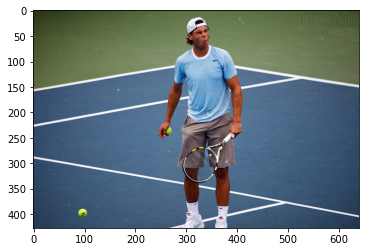

In [11]:
imgid_with_max_questions = img_question_counts.index[0]
show_fvqa_image(imgid_with_max_questions)
col = ['question','fact', 'question_id', 'answer']
questions_data_df[questions_data_df['img_file'] == imgid_with_max_questions][col]

### Visual Concepts Processing

In [12]:
# Load Visula Concept Classes

coco_classes = np.asarray(['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                           'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
                           'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
                           'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
                           'tie', 'suitcase', 'frisbee', 'skis','snowboard', 'sports ball', 'kite',
                           'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                           'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
                           'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                           'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
                           'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
                           'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
                           'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'])

imagenet_classes = np.asarray(['__background__', 'accordion', 'airplane', 'ant', 'antelope', 'apple', 'armadillo',
                    'artichoke', 'axe', 'baby bed', 'backpack', 'bagel', 'balance beam', 'banana', 'band aid', 'banjo', 'baseball',
                    'basketball', 'bathing cap', 'beaker', 'bear', 'bee', 'bell pepper', 'bench', 'bicycle', 'binder', 'bird',
                    'bookshelf', 'bow tie', 'bow', 'bowl', 'brassiere', 'burrito', 'bus', 'butterfly', 'camel', 'can opener',
                    'car', 'cart', 'cattle', 'cello', 'centipede', 'chain saw', 'chair', 'chime', 'cocktail shaker', 'coffee maker',
                    'computer keyboard', 'computer mouse', 'corkscrew', 'cream', 'croquet ball', 'crutch', 'cucumber',
                    'cup or mug', 'diaper', 'digital clock', 'dishwasher', 'dog', 'domestic cat', 'dragonfly', 'drum', 'dumbbell',
                    'electric fan', 'elephant', 'face powder', 'fig', 'filing cabinet', 'flower pot', 'flute', 'fox', 'french horn',
                    'frog', 'frying pan', 'giant panda', 'goldfish', 'golf ball', 'golfcart', 'guacamole', 'guitar', 'hair dryer',
                     'hair spray', 'hamburger', 'hammer', 'hamster', 'harmonica', 'harp', 'hat with a wide brim', 'head cabbage',
                     'helmet', 'hippopotamus', 'horizontal bar', 'horse', 'hotdog', 'iPod', 'isopod', 'jellyfish', 'koala bear',
                     'ladle', 'ladybug', 'lamp', 'laptop', 'lemon', 'lion', 'lipstick', 'lizard', 'lobster', 'maillot', 'maraca',
                     'microphone', 'microwave', 'milk can', 'miniskirt', 'monkey', 'motorcycle', 'mushroom', 'nail', 'neck brace',
                     'oboe', 'orange', 'otter', 'pencil box', 'pencil sharpener', 'perfume', 'person', 'piano', 'pineapple',
                     'ping-pong ball', 'pitcher', 'pizza', 'plastic bag', 'plate rack', 'pomegranate', 'popsicle', 'porcupine',
                     'power drill', 'pretzel', 'printer', 'puck', 'punching bag', 'purse', 'rabbit', 'racket', 'ray', 'red panda',
                     'refrigerator', 'remote control', 'rubber eraser', 'rugby ball', 'ruler', 'salt or pepper shaker', 'saxophone',
                     'scorpion', 'screwdriver', 'seal', 'sheep', 'ski', 'skunk', 'snail', 'snake', 'snowmobile', 'snowplow', 'soap dispenser',
                     'soccer ball', 'sofa', 'spatula', 'squirrel', 'starfish', 'stethoscope', 'stove', 'strainer', 'strawberry', 'stretcher',
                     'sunglasses', 'swimming trunks', 'swine', 'syringe', 'table', 'tape player', 'tennis ball', 'tick', 'tie', 'tiger',
                     'toaster', 'traffic light', 'train', 'trombone', 'trumpet', 'turtle', 'tv or monitor', 'unicycle', 'vacuum', 'violin',
                     'volleyball', 'waffle iron', 'washer', 'water bottle', 'watercraft', 'whale', 'wine bottle', 'zebra'])

places_365_classes = []

utils_path = "utils"

with open(os.path.join(utils_path, 'places365classes.txt')) as class_file:
    for line in class_file:
        places_365_classes.append(line.strip().split(' ')[0][3:])

hoi_file = open(os.path.join(utils_path, "hico_list_hoi.txt"))
next(hoi_file)
next(hoi_file)
hoi_dictionary = {}
hois = []

verb_dictionary = {}
verbs_list = []
for line in hoi_file:
    no_zeros = line.strip("0")
    line = no_zeros.split()
    hoi_dictionary[line[0]] = " ".join(line[1:])
    hois.append(" ".join(line[1:]))

verb_dictionary = {}
a_file = open(os.path.join(utils_path, "hico_list_vb.txt"))
next(a_file)
next(a_file)
for line in a_file:
    key, value = line.split()
    key = key.strip("0")
    verb_dictionary[key] = value
    verbs_list.append(value)

visual_concepts = []
visual_concepts.extend(coco_classes.tolist())
visual_concepts.extend(imagenet_classes.tolist())
visual_concepts.extend(places_365_classes)
visual_concepts.extend(hois)
print('Total visual_concepts length = ', len(visual_concepts))
visual_concepts = pd.Series(np.array(visual_concepts)).unique()
print('Unique visual_concepts length = ', len(visual_concepts))

visual_concepts_count_words = Counter(visual_concepts)
visual_concepts_total_words = len(visual_concepts)
visual_concepts_sorted_words = visual_concepts_count_words.most_common(visual_concepts_total_words)
visual_concepts_vocab_to_int = {w:i for i, (w,c) in enumerate(visual_concepts_sorted_words)}
visual_concepts_int_to_vocab = {i:w for i, (w,c) in enumerate(visual_concepts_sorted_words)}

Total visual_concepts length =  1247
Unique visual_concepts length =  1218


In [13]:
# Visula concept Processing
coco_index = []
coco_objects = []

imagenet_index = []
imagenet_objects = []

hoi_index = []
hoi_labels = []

places365_index = []
places365_labels = []

json_dir = 'fvqa_data//visual_concepts'

detected_visual_concepts_i = []
detected_visual_concepts = []

for index, row in merged_ques_facts_df.iterrows():
    img_name = row['img_file']
    ext = img_name.split('.')[-1:][0]
    json_file = img_name.replace(ext, 'json')
    f = open(os.path.join(json_dir, json_file))
    json_data = json.load(f)
    coco_i = json_data['coco-faster-rcnn']['index']
    coco_l = json_data['coco-faster-rcnn']['labels']
    imagenet_i = json_data['imagenet-faster-rcnn']['index']
    imagenet_l = json_data['imagenet-faster-rcnn']['labels']
    places365_i = np.array(json_data['places-365-detections']['index'])[0:5]
    places365_l = np.array(json_data['places-365-detections']['labels'])[0:5]
    hoi_i = []
    hoi_l = []

    coco_index.append(coco_i); coco_objects.append(coco_l)
    imagenet_index.append(imagenet_i); imagenet_objects.append(imagenet_l)
    places365_index.append(places365_i); places365_labels.append(places365_l)

    if len(json_data['results']) > 0:
        hoi_i = json_data['results']['hoi']['index']
        hoi_l = json_data['results']['hoi']['hois']
        hoi_index.append(hoi_i)
        hoi_labels.append(hoi_l)
    else:
        hoi_index.append([])
        hoi_labels.append([])
    single_visual_concepts = []

    single_visual_concepts.extend(coco_l)
    single_visual_concepts.extend(imagenet_l)
    single_visual_concepts.extend(places365_l.tolist())
    single_visual_concepts.extend(hoi_l)
    single_visual_concepts = pd.Series(np.array(single_visual_concepts)).unique()

    single_visual_concepts_i = [visual_concepts_vocab_to_int[x] for x in single_visual_concepts]

    detected_visual_concepts.append(single_visual_concepts)
    detected_visual_concepts_i.append(single_visual_concepts_i)

In [14]:
# merged_ques_facts_df['coco_index'] = coco_index
merged_ques_facts_df['coco_objects'] = coco_objects
# merged_ques_facts_df['imagenet_index'] = imagenet_index
merged_ques_facts_df['imagenet_objects'] = imagenet_objects
# merged_ques_facts_df['places365_index'] = places365_index
merged_ques_facts_df['places365_labels'] = places365_labels
# merged_ques_facts_df['hoi_index'] = hoi_index
merged_ques_facts_df['hoi_labels'] = hoi_labels
merged_ques_facts_df['detected_visual_concepts'] = detected_visual_concepts
# merged_ques_facts_df['detected_visual_concepts_i'] = detected_visual_concepts_i

# del coco_index, coco_objects, imagenet_index, imagenet_objects, places365_index, places365_labels, hoi_index, hoi_labels
# del detected_visual_concepts, detected_visual_concepts_i

In [15]:
from string import punctuation
def visual_concept_preprocessing(detected_visual_concepts):
    return [vc.replace('_', ' ').replace('/', ' ') for vc in detected_visual_concepts if vc not in punctuation]
merged_ques_facts_df['detected_visual_concepts'] = merged_ques_facts_df['detected_visual_concepts'].apply(lambda vc:visual_concept_preprocessing(vc))

In [16]:
merged_ques_facts_df['detected_visual_concepts']

270     [person, traffic light, umbrella, handbag, tie...
271     [cell phone, lipstick, chemistry lab, clean ro...
569     [person, bottle, knife, bowl, vase, face powde...
272     [cell phone, lipstick, chemistry lab, clean ro...
383     [bottle, cup, book, lipstick, beauty salon, co...
                              ...                        
5635    [person, umbrella, handbag, tennis racket, cru...
5636    [person, umbrella, handbag, tennis racket, cru...
5637    [person, umbrella, handbag, tennis racket, cru...
5630    [bird, turtle, desert sand, iceberg, science m...
5632    [person, umbrella, handbag, tennis racket, cru...
Name: detected_visual_concepts, Length: 5826, dtype: object

In [17]:
col_filter = ['question','img_file', 'answer', 'detected_visual_concepts']
merged_ques_facts_df.loc[:, col_filter].head(10)

,question,img_file,answer,detected_visual_concepts
270,Which object can be found in a jazz club,ILSVRC2012_test_00050748.JPEG,trumpet,"[person, traffic light, umbrella, handbag, tie..."
271,Tell me the name of the cosmetics shown in thi...,ILSVRC2012_test_00000444.JPEG,lipstick,"[cell phone, lipstick, chemistry lab, clean ro..."
569,what object in this image is a cosmetic placed...,ILSVRC2012_test_00045533.JPEG,lipstick,"[person, bottle, knife, bowl, vase, face powde..."
272,What is the object shown in this image used for,ILSVRC2012_test_00000444.JPEG,coloring the lips,"[cell phone, lipstick, chemistry lab, clean ro..."
383,Which item in this image is used for colouring...,ILSVRC2012_test_00002289.JPEG,lipstick,"[bottle, cup, book, lipstick, beauty salon, co..."
3756,Which item in this image is to color lips?,ILSVRC2012_test_00045533.JPEG,lipstick,"[person, bottle, knife, bowl, vase, face powde..."
273,Where can you find the object in this image,ILSVRC2012_test_00000444.JPEG,a makeup cabinet,"[cell phone, lipstick, chemistry lab, clean ro..."
274,Which object in this image has a tail,COCO_val2014_000000005599.jpg,kite,"[person, umbrella, sports ball, kite, coast, p..."
5221,What object has tail?,COCO_val2014_000000023200.jpg,Kite.,"[person, kite, surfboard, airplane, iceberg, o..."
275,what object in this image is commonly eaten fo...,COCO_val2014_000000015079.jpg,sandwich,"[knife, sandwich, dining table, hamburger, ice..."


In [18]:
common_classes = [x for x in coco_classes if x in imagenet_classes and places_365_classes]
len_coco = len(coco_classes)
len_imagenet = len(imagenet_classes)
print('total coco classes = ', len_coco)
print('total imagenet classes = ', len_imagenet)
print('total imagenet and coco = ', len_coco + len_imagenet)
print('common classes imagenet and coco = ', len(common_classes))

print('===============================')
print('Total Visual Concepts')
print('===============================')
print('different classes imagenet and coco = ', len_coco + len_imagenet - len(common_classes))
print('total places 365 classes = ', len(places_365_classes))
print('total hoi (human object interaction) classes = ', len(hois))

print('total Visual Concepts = ',  len_coco + len_imagenet - len(common_classes) + len(places_365_classes) + len(hois))

total coco classes =  81
total imagenet classes =  201
total imagenet and coco =  282
common classes imagenet and coco =  29
Total Visual Concepts
different classes imagenet and coco =  253
total places 365 classes =  365
total hoi (human object interaction) classes =  600
total Visual Concepts =  1218


### Loading GloVe 300d embeddings

In [19]:
embeddings_dict = {}
path_glove300d = "F:\\NUST\\thesis_local\\Practice\\straight-to-the-fact\\glove.6B"
with open(os.path.join(path_glove300d, "glove.6B.300d.txt"), 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [20]:
embeddings_dict['person']

array([-5.5598e-01,  2.7967e-02, -3.2289e-01, -7.5042e-02, -1.3179e-01,
        1.3271e-01, -1.5578e-01,  1.1468e-01, -5.5989e-02, -1.6266e+00,
        1.2912e-01, -2.0525e-01, -2.1620e-01, -8.7432e-02, -8.5335e-02,
        3.3107e-02, -2.2467e-01, -9.9248e-02, -2.1777e-01, -2.5671e-01,
        6.3234e-02,  5.0175e-01, -1.6002e-01,  3.0961e-01,  2.0912e-01,
       -2.9045e-01,  4.2019e-02, -2.2472e-02,  2.4542e-01, -7.5772e-02,
       -5.6552e-01,  6.2501e-01, -3.5209e-01, -6.0992e-01, -9.3654e-01,
        2.5625e-01,  2.1782e-01, -2.4591e-01, -5.3093e-01,  2.0034e-01,
        2.2471e-02,  7.3258e-02, -2.9808e-02,  8.2042e-02, -2.6838e-01,
        1.1861e-02,  5.9190e-01,  8.2740e-03, -7.7560e-02,  3.7252e-01,
        1.2574e-01,  5.6610e-02,  6.1548e-01,  1.9826e-01, -5.3163e-02,
        2.7715e-01,  1.5825e-01,  1.3941e-01,  3.5109e-01, -2.1844e-01,
        1.0418e-01,  8.9417e-02,  1.1362e-01,  2.5903e-01, -1.0444e-01,
       -3.0457e-01, -3.6033e-01, -2.2062e-01, -4.7356e-01,  4.80

In [21]:
from scipy import spatial
def calculate_cosine_distance(a, b):
    cosine_distance = float(spatial.distance.cosine(a, b))
    return cosine_distance
def calculate_cosine_similarity(a, b):
    cosine_similarity = 1 - calculate_cosine_distance(a, b)
    return cosine_similarity

### Similar Facts

In [28]:
from string import punctuation
def question_glove_embedding(question):
    question = ''.join([q for q in question if q not in punctuation])
    # print(question)
    question = question.split()
    question_words_emb = []
    for w in question:
        try:
            question_words_emb.append(embeddings_dict[w.lower()])
        except KeyError:
            question_words_emb.append(np.zeros(300))
    data = np.array(question_words_emb)
    question_glove_emb = np.average(data, axis=0)
    return question_glove_emb

def visual_concept_glove_embedding(vc_list):
    vc_list = [word for vc in vc_list for word in vc.split()]
    vc_words_emb = [0] * 300
    # print('all', vc_list)
    # print('exsist')
    for w in vc_list:
        if w in fvqa_vocab_to_int:
            # print(w.lower())
            try:
                vc_words_emb.append(embeddings_dict[w.lower()])
            except KeyError:
                vc_words_emb.append(np.zeros(300))
    data = np.array(vc_words_emb)
    visual_concepts_glove_emb = np.average(data, axis=0)
    return visual_concepts_glove_emb

In [29]:
def fact_glove_embeddings(fact):
    e1_labels = fact['e1_label']
    e1_labels = ''.join([label for label in e1_labels if label not in punctuation])
    fact_words = e1_labels.split()
    e2_labels = fact['e2_label']
    e2_labels = ''.join([label for label in e2_labels if label not in punctuation])
    fact_words.extend(e2_labels.split())
    fact_emb = []
    for w in fact_words:
        try:
            fact_emb.append(embeddings_dict[w.lower()])
        except KeyError:
            fact_emb.append(np.zeros(300))
    fact_emb = np.array(fact_emb)
    fact_emb = np.average(fact_emb, axis=0)
    return fact_emb

In [31]:
first_ques = merged_ques_facts_df.iloc[0]
most_similar_fact = all_facts_data_df.loc['conceptnet/e/bdb278197e7b379d787a9fb0fd24688a73a44da9']
supporting_similar_fact = all_facts_data_df.loc['conceptnet/e/f768f157e4446dd594536f8ef02681515586ba2d']
ques_emb = question_glove_embedding(first_ques['question'])
vc_emb = visual_concept_glove_embedding(first_ques['detected_visual_concepts'])
vc_ques_emb = np.average([ques_emb, vc_emb], axis=0)

most_similar_fact_emb = fact_glove_embeddings(most_similar_fact)
supporting_similar_fact_emb = fact_glove_embeddings(supporting_similar_fact)

most_similar_fact_similarity = calculate_cosine_similarity(vc_ques_emb, most_similar_fact_emb)
supporting_similar_fact_similarity = calculate_cosine_similarity(vc_ques_emb, supporting_similar_fact_emb)

print('top similar fact and its similarity:', most_similar_fact_similarity, most_similar_fact)
print('ground truth fact and its similarity:', supporting_similar_fact_similarity, supporting_similar_fact)

top similar fact and its similarity: 0.8627697229385376 KB                                                  conceptnet
e1_label     difference between bicycle and audience one be...
e2_label                                                 metal
uri          /a/[/r/MadeOf/,/c/en/difference_between_bicycl...
surface      [[difference between a bicycle and an audience...
dataset                                     /d/conceptnet/4/en
sources      /and/[/s/activity/omcs/globalmind/,/s/contribu...
r                                                    /r/MadeOf
context                                               /ctx/all
score                                                      1.0
e1           /c/en/difference_between_bicycle_and_audience_...
e2                                                 /c/en/metal
isnegated                                                  NaN
Name: conceptnet/e/bdb278197e7b379d787a9fb0fd24688a73a44da9, dtype: object
ground truth fact and its similarity: 0.5102825164

In [32]:
merged_ques_facts_df['question_glove_emb'] = merged_ques_facts_df['question'].apply(lambda q:question_glove_embedding(q))
merged_ques_facts_df['detected_visual_concepts_glove_emb'] = merged_ques_facts_df['detected_visual_concepts'].apply(lambda vc:visual_concept_glove_embedding(vc))
merged_ques_facts_df['vc_ques_avg_emb'] = merged_ques_facts_df.apply(lambda x: np.average([x['question_glove_emb'], x['detected_visual_concepts_glove_emb']], axis=0), axis=1)

In [33]:
col_filter = ['question_glove_emb', 'detected_visual_concepts_glove_emb', 'vc_ques_avg_emb']
merged_ques_facts_df[col_filter]

,question_glove_emb,detected_visual_concepts_glove_emb,vc_ques_avg_emb
270,"[-0.3192547, 0.26529467, -0.13019101, -0.16838...","[-0.011033769, 0.0069697397, -0.023061635, -0....","[-0.16514423, 0.13613221, -0.07662632, -0.0946..."
271,"[-0.070112996, 0.1646, -0.08106989, -0.3089736...","[-0.0054393103, 0.008085377, -0.0063661477, -0...","[-0.037776154, 0.086342685, -0.043718018, -0.1..."
569,"[-0.20552087, 0.15748252, -0.018667035, -0.174...","[-0.007785855, 0.017889425, -0.0054256804, -0....","[-0.10665336, 0.08768597, -0.012046358, -0.098..."
272,"[-0.26991102, 0.22777131, 0.03530276, -0.27782...","[-0.0054393103, 0.008085377, -0.0063661477, -0...","[-0.13767517, 0.11792834, 0.014468305, -0.1442..."
383,"[-0.21976165, 0.23105346, -0.0057196724, -0.23...","[-0.0030261187, 0.009321309, -0.009402407, -0....","[-0.111393884, 0.12018738, -0.00756104, -0.122..."
...,...,...,...
5635,"[-0.26219252, 0.16085917, 0.011727732, -0.3932...","[0.0053973957, 0.006078431, -0.008733016, 0.00...","[-0.12839755, 0.0834688, 0.0014973576, -0.1965..."
5636,"[-0.26406524, 0.19928311, -0.028189087, -0.270...","[0.0053973957, 0.006078431, -0.008733016, 0.00...","[-0.12933391, 0.10268077, -0.018461052, -0.135..."
5637,"[-0.23855767, 0.12600236, 0.10651863, -0.26640...","[0.0053973957, 0.006078431, -0.008733016, 0.00...","[-0.116580136, 0.0660404, 0.048892807, -0.1330..."
5630,"[-0.17295003, 0.1182359, -0.05399558, -0.21182...","[0.00043347242, 0.00538909, -0.009048859, 0.00...","[-0.08625828, 0.061812494, -0.03152222, -0.105..."


In [34]:
all_facts_data_df['glove_emb'] = all_facts_data_df.apply(lambda fact: fact_glove_embeddings(fact), axis=1)

In [35]:
all_facts_data_df.head(5)

,KB,e1_label,e2_label,uri,surface,dataset,sources,r,context,score,e1,e2,isnegated,glove_emb
conceptnet/e/a9c086711e083ba3503a06846848e30999b4d3f7,conceptnet,monkey meat,meat,"/a/[/r/RelatedTo/,/c/en/monkey_meat/n/,/c/en/m...",[[monkey meat]] is related to [[meat]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/monkey_meat/n,/c/en/meat,NaN,"[0.42921934, 0.6463533, 0.08809, -0.22409, 0.0..."
conceptnet/e/acfa62a6eab1fd51f6bafca20f46277c37f1bcb9,conceptnet,neuroimaging,image,"/a/[/r/EtymologicallyDerivedFrom/,/c/en/neuroi...","The word ""[[neuroimaging]]"" etymologically com...",/d/wiktionary/en/en,"/and/[/s/rule/etymology_section/,/s/web/en.wik...",/r/EtymologicallyDerivedFrom,/ctx/all,1.0,/c/en/neuroimaging,/c/en/image,NaN,"[-0.011935149, 0.0537815, 0.239025, -0.44934, ..."
conceptnet/e/f00e325c34450297a00026be9a99b63e339e5539,conceptnet,jamaica,island,"/a/[/r/RelatedTo/,/c/en/jamaica/n/,/c/en/island/]",[[Jamaica]] is related to [[island]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/jamaica/n,/c/en/island,NaN,"[0.206307, -0.43048, -0.40867, 0.033659995, 0...."
conceptnet/e/9e911a1a354fde0b691a62681e10ac3c7cf09407,conceptnet,train,arrive at station,"/a/[/r/CapableOf/,/c/en/train/,/c/en/arrive_at...",[[a train]] can [[arrive at a station]],/d/conceptnet/4/en,/and/[/s/activity/omcs/omcs1_possibly_free_tex...,/r/CapableOf,/ctx/all,1.0,/c/en/train,/c/en/arrive_at_station,NaN,"[-0.1689595, 0.11723375, 0.16884, 0.03798775, ..."
conceptnet/e/a86ca74c722e436c1fdb7084daa45ff03a93c1ab,conceptnet,aletschhorn,mountain,"/a/[/r/RelatedTo/,/c/en/aletschhorn/n/,/c/en/m...",[[Aletschhorn]] is related to [[mountain]],/d/wiktionary/en/en,"/and/[/s/rule/definition_section/,/s/web/en.wi...",/r/RelatedTo,/ctx/all,1.0,/c/en/aletschhorn/n,/c/en/mountain,NaN,"[-0.2162950038909912, 0.2034599930047989, -0.0..."


In [ ]:
predicted_relations_df = pd.read_pickle("fvqa_data//relation_type_classifier//predicted_relations.pkl")
merged_ques_facts_df = pd.merge(merged_ques_facts_df, predicted_relations_df, left_index=True, right_index=True)

In [ ]:
merged_ques_facts_df.to_pickle('merged_ques_facts_df.pkl')
all_facts_data_df.to_pickle('all_facts_data_df.pkl')

In [ ]:
merged_ques_facts_df = pd.read_pickle("merged_ques_facts_df.pkl")

In [37]:
def fact_similarity(merged_df_row):
    K= 100
    fact_similarity_scores = []
    for index, fact_row in all_facts_data_df.iterrows():
        fact_similarity_scores.append(calculate_cosine_similarity(merged_df_row['vc_ques_avg_emb'],
                                                                             fact_row['glove_emb']))
    all_facts_data_df['similarty_scores'] = fact_similarity_scores
    sorted_facts_df = all_facts_data_df.sort_values(by=['similarty_scores'], ascending=False)
    topKfacts = sorted_facts_df.iloc[0: K]
    # print(fact_row)
    # print(topKfacts)
    return topKfacts.index.tolist(), topKfacts['similarty_scores'].tolist()

In [ ]:
top_100_similar_facts = []
# loopcount = 1
for index, row in merged_ques_facts_df.iterrows():
    print(index, ')', row['question'])
    # if loopcount == 2:
    #     break
    # loopcount+=1
    topK_similar_fact_ids, topK_similar_fact_scores = fact_similarity(row)
    topK_similar_fact_dict = dict(zip(topK_similar_fact_ids, topK_similar_fact_scores))
    top_100_similar_facts.append(topK_similar_fact_dict)

270 ) Which object can be found in a jazz club


C:\ProgramData\Anaconda3\envs\mucko-edit\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


271 ) Tell me the name of the cosmetics shown in this image?
569 ) what object in this image is a cosmetic placed on the lips?
272 ) What is the object shown in this image used for
383 ) Which item in this image is used for colouring the lips?
3756 ) Which item in this image is to color lips?
273 ) Where can you find the object in this image
274 ) Which object in this image has a tail
5221 ) What object has tail?
275 ) what object in this image is commonly eaten for lunch?
276 ) Which object in this image can cut you
277 ) Which object in this image can be used for cutting things
1905 ) Which object in this image is used for cutting things?
278 ) Which object in this image is able to cut food
5005 ) Which object in this image is capable of cut food?
279 ) Which object in this photo can hurt you
974 ) Which thing in the image can hurt you?
3519 ) Which object in this image can carry person?
5819 ) What object in this image is used to carry people?
3960 ) Which object in this image is ca

In [52]:
list(topK_similar_fact_dict.keys())

SyntaxError: can't use starred expression here (<ipython-input-52-898660ccff5f>, line 4)

In [53]:
# top K similar facts
col_filter = ['e1_label', 'e2_label', 'r', 'similarty_scores']
all_facts_data_df.loc[list(topK_similar_fact_dict.keys()), col_filter]

,e1_label,e2_label,r,similarty_scores
conceptnet/e/b0f9c6642c3b72edcf48f8a096cc06610b4851e4,hand,part of body with five extension which can be ...,/r/IsA,0.885676
conceptnet/e/f6f82efb9cb144239bb12d10cfce96551497a1f1,person,know which way be home,/r/Desires,0.867537
conceptnet/e/1ca1e156c530715b93d79422c16a1d90c7d13466,person,be put in centrfuige,/r/NotDesires,0.863351
conceptnet/e/bdb278197e7b379d787a9fb0fd24688a73a44da9,difference between bicycle and audience one be...,metal,/r/MadeOf,0.862770
conceptnet/e/84f3b7c2c20fb039b4088c762517ac79a4ca376d,book,collection of symbol on sheet of paper that ha...,/r/IsA,0.862736
...,...,...,...,...
conceptnet/e/77deaddd59f9610dee1cb54e3b75c2d5017594b7,person,be of good will,/r/Desires,0.827736
conceptnet/e/7e40c16e62f53d14fbd4442d7079225a684674b4,cat,play with thing that they shouldn't,/r/Desires,0.827655
conceptnet/e/17d71f5516324ef132fd52d1ad6dfe6660c9f023,person,his child to be well,/r/Desires,0.827601
conceptnet/e/8734ca7ada6c8ba4c3b9f25a7936570ccb36d329,person,be leave out in cold,/r/NotDesires,0.827435


In [ ]:
def node_embedding(node):
    node = ''.join([label for label in node if label not in punctuation])
    node_words = node.split()
    node_words_emb = []
    if len(node_words) == 0:
        return np.zeros(300, dtype=np.float32)
    for w in node_words:
        try:
            node_words_emb.append(embeddings_dict[w.lower()])
        except KeyError:
            return np.zeros(300, dtype=np.float32)
    node_words_emb = np.array(node_words_emb)
    node_words_emb = np.average(node_words_emb, axis=0)
    return node_words_emb

### Semantic Graph Creation

In [ ]:
import json
semantic_graph_dict = dict()
with open("fvqa_data//captions_scene_graph//captions_with_scenegraphs.json", 'r') as f:
    semantic_graph_data = json.loads(f.read())

for sm_graph in semantic_graph_data:
    semantic_graph_dict[sm_graph['img_name']] = sm_graph

semantic_graph_dict['ILSVRC2012_test_00050748.JPEG']['scenegraph']

In [ ]:
sg_all_nodes_list = []
sg_all_relation_list = []
sg_all_e1_label_list = []
sg_all_e2_label_list = []
sg_node_counts = []

sg_e1_ids_dgl = []
sg_e2_ids_dgl = []

count = 1

node_features = []
edge_features = []
for index, row in merged_ques_facts_df.iterrows():
#     if count == 5:
#         break
#     count+=1
    print(index)
    sg_nodes_list = []
    sg_relation_list = []
    sg_e1_label_list = []
    sg_e2_label_list = []

    sg_labels_encoding = {}
    sg_e1_id_dgl = []
    sg_e2_id_dgl = []
    sg_label = 0
    for fact in semantic_graph_dict[row['img_file']]['scenegraph']:
        if fact['e1_lable'] not in sg_labels_encoding:
            sg_labels_encoding[fact['e1_lable']] = sg_label
            sg_e1_id_dgl.append(sg_label)
            sg_label += 1
        else:
            sg_e1_id_dgl.append(sg_labels_encoding[fact['e1_lable']])

        if fact['e2_lable'] not in sg_labels_encoding:
            sg_labels_encoding[fact['e2_lable']] = sg_label
            sg_e2_id_dgl.append(sg_label)
            sg_label += 1
        else:
            sg_e2_id_dgl.append(sg_labels_encoding[fact['e2_lable']])

        sg_relation_list.append(fact['relation'].lower())



    sg_e1_ids_dgl.append(sg_e1_id_dgl)
    sg_e2_ids_dgl.append(sg_e2_id_dgl)
    sg_all_relation_list.append(sg_relation_list)
    sg_node_counts.append(len(sg_labels_encoding.keys()))


    node_emabeddings = [node_embedding(n).tolist() for n in sg_labels_encoding.keys() ]
    node_features.append(np.array(node_emabeddings))

    relation_embeddings = [node_embedding(r).tolist() for r in sg_relation_list ]
    edge_features.append(np.array(relation_embeddings))


merged_ques_facts_df['sg_e1_ids'] = sg_e1_ids_dgl
merged_ques_facts_df['sg_e2_ids'] = sg_e2_ids_dgl
merged_ques_facts_df['sg_node_counts'] = sg_node_counts
merged_ques_facts_df['sg_all_relation_list'] = sg_all_relation_list

In [ ]:
np.savez("fvqa_data//our_features//semantic_graph_train_feature.npz", node_features = np.array(node_features),
         edge_features = np.array(edge_features))

### Vocabulary word count and glove embeddings

In [ ]:
import json
with open('fvqa_data//our_features//word_count.json', 'r') as j:
    fvqa_count_words = json.loads(j.read())
fvqa_vocb_embedding = []
for key in fvqa_count_words.keys():
    fvqa_vocb_embedding.append(node_embedding(key))
np.save('fvqa_data//our_features//glove300dvocab.npy', np.array(fvqa_vocb_embedding))

In [ ]:
max_ques_len = 25
def find_question_embeddings(question):
    ques_emb = [fvqa_vocab_to_int[re.sub('[^a-zA-Z]+', '', y)] for y in question.lower().split()]
    padding = max_ques_len - len(ques_emb)
    ques_emb.extend(np.zeros(padding, dtype=np.int8))
    return ques_emb
merged_ques_facts_df['question_embedding'] = merged_ques_facts_df['question'].apply(lambda x:find_question_embeddings(x))
merged_ques_facts_df['question_embedding'] = merged_ques_facts_df['question_embedding'].apply(lambda x: [int(e) for e in x])